# *Healthy and Bleached Corals Image Classification Dataset*



www.kaggle.com/datasets/vencerlanz09/healthy-and-bleached-corals-image-classification

### Letter to the president of IslandCity

Dear President of IslandCity,

I am writing on behalf of DS Pros, a company dedicated to providing innovative data science solutions. We are eager to demonstrate how our expertise can benefit your city by addressing one of its pressing challenges.

After carefully reviewing the open data sets available for IslandCity, we identified a significant issue: the health of your coastal waters. Water impurity is a concern that affects both the environment and the local economy. To address this, we have developed a classification model that distinguishes between bleached and healthy corals that, as you know, are important biomarkers of water purity. Implementing this model can provide several key benefits to the city:

    Environmental Monitoring: Corals are sensitive indicators of water quality. Our model accurately classifies coral health, facilitating continuous and efficient monitoring of the marine environment. This enables early detection of water pollution or other detrimental changes, allowing for timely intervention and conservation efforts.

    Tourism Enhancement: Healthy corals attract tourists, contributing to the local economy. By maintaining an accurate assessment of coral health, IslandCity can promote its pristine marine environment, enhancing its reputation as a desirable tourist destination.

    Conservation Efforts: The model assists in prioritizing areas that need immediate attention and resources for coral reef restoration. This targeted approach ensures effective use of funds and efforts, leading to better preservation of marine biodiversity.

By leveraging our classification model, IslandCity can safeguard its marine environment, bolster tourism, and enhance its conservation strategies. We believe this proactive solution not only addresses a critical issue but also positions IslandCity as a leader in environmental stewardship.

We would be delighted to present this proposal to your technical office and discuss how DS Pros can assist IslandCity in achieving these goals.

Sincerely,

Francesco D'Aleo
Head Of Engineering - DS Pros


### Dataset Details

    Total images: 923
    Image categories: 2
        Healthy corals: 438 images
        Bleached corals: 485 images
    Image format: JPEG
    Image size: Maximum 300 px for either width or height, whichever is higher
    Source: Flickr API


### Install libraries
```python
!pip install tensorflow scikit-learn pandas numpy opencv-python matplotlib seaborn imutils

### Import libraries

In [5]:
import pandas as pd
import numpy as np

import os
from imutils import paths

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import keras
import keras_tuner as kt
from kerastuner.tuners import RandomSearch
from keras.regularizers import l2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C:\Users\franc\AppData\Local\Temp\ipykernel_17108\3382189177.py:13: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Analysis of Open Data Sets for IslandCity

In [7]:
dataset = 'DB_corals'

In [8]:
imagePaths = list(paths.list_images('DB_corals'))

data = []
labels = []

for imagePath in imagePaths:

    label = imagePath.split(os.path.sep)[-2]

    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))

    data.append(image)
    labels.append(label)

In [9]:
set(labels)

{'bleached_corals', 'healthy_corals'}

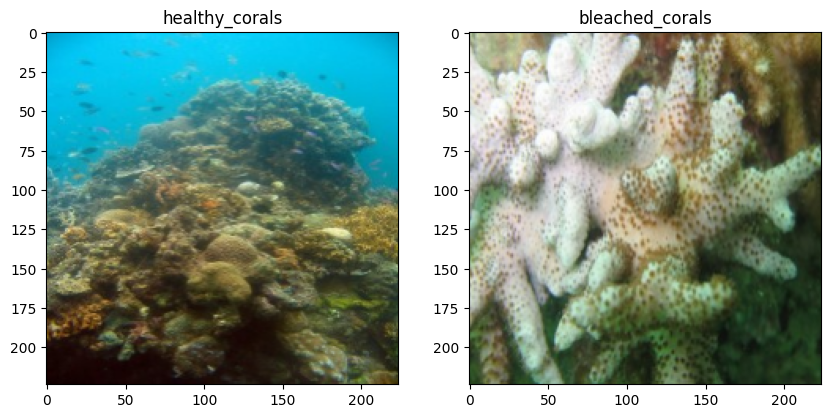

In [24]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(data[600])
plt.title(labels[600])

plt.subplot(1,2,2)
plt.imshow(data[10])
plt.title(labels[10])

plt.show()


### Data Preparation: Train-Test Split

To effectively develop and evaluate the coral health classification model, it's essential to split the dataset into training, validation and testing sets.

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.1, random_state=42)

### Data Normalization

Normalizing the data ensures that all features contribute equally to the model's performance

In [11]:
X_train = np.array(X_train) / 255.0
X_valid = np.array(X_valid) / 255.0
X_test = np.array(X_test) / 255.0

In [12]:
y_train = np.array([1 if label == 'healthy_corals' else 0 for label in y_train])
y_valid = np.array([1 if label == 'healthy_corals' else 0 for label in y_valid])
y_test = np.array([1 if label == 'healthy_corals' else 0 for label in y_test])

### Model Training and Evaluation

After normalizing the data, we can proceed to train a classification model

In [40]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

### Choice of the Model

The CNN architecture described below is commonly utilized for binary image classification tasks:

    It consists of alternating convolutional and max pooling layers for feature extraction.
    Followed by fully connected layers for classification.
    ReLU activation functions are employed for hidden layers.
    Sigmoid activation function is applied to the output layer to produce binary predictions.

This architecture strikes a balance between complexity and performance, rendering it suitable for tasks such as coral classification.

In [40]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [41]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model_1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


21/21 [==============================] - 13s 528ms/step - loss: 0.9549 - accuracy: 0.5738 - val_loss: 0.6428 - val_accuracy: 0.6081
Epoch 2/20
21/21 [==============================] - 11s 506ms/step - loss: 0.5860 - accuracy: 0.6627 - val_loss: 0.5689 - val_accuracy: 0.6892
Epoch 3/20
21/21 [==============================] - 11s 517ms/step - loss: 0.5393 - accuracy: 0.7169 - val_loss: 0.5778 - val_accuracy: 0.7297
Epoch 4/20
21/21 [==============================] - 11s 539ms/step - loss: 0.5173 - accuracy: 0.7184 - val_loss: 0.6273 - val_accuracy: 0.6351
Epoch 5/20
21/21 [==============================] - 11s 541ms/step - loss: 0.5177 - accuracy: 0.7108 - val_loss: 0.5667 - val_accuracy: 0.6757
Epoch 6/20
21/21 [==============================] - 12s 554ms/step - loss: 0.5021 - accuracy: 0.7349 - val_loss: 0.5470 - val_accuracy: 0.7297
Epoch 7/20
21/21 [==============================] - 12s 569ms/step - loss: 0.4454 - accuracy: 0.7696 - val_loss: 0.6419 - val_accuracy: 0.67

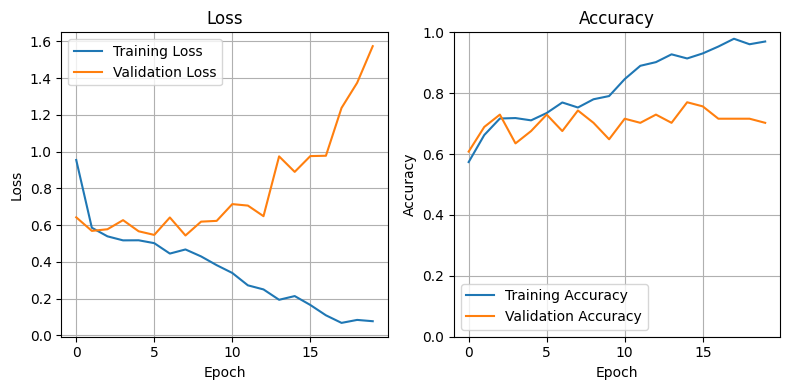

In [43]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

### Data Augmentation for Improved Model Performance

This model exhibits overfitting as the loss decreases only in the training set and not in the validation set.

To mitigate overfitting and improve the model's generalization, we can apply data augmentation techniques to increase the complexity of the training set.

In [52]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)




In [54]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [55]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history_2 = model_2.fit(train_generator, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 16s 684ms/step - loss: 0.9360 - accuracy: 0.5602 - val_loss: 0.6047 - val_accuracy: 0.7162
Epoch 2/20
21/21 [==============================] - 17s 793ms/step - loss: 0.6273 - accuracy: 0.6581 - val_loss: 0.5761 - val_accuracy: 0.6622
Epoch 3/20
21/21 [==============================] - 15s 737ms/step - loss: 0.6108 - accuracy: 0.6777 - val_loss: 0.5957 - val_accuracy: 0.6892
Epoch 4/20
21/21 [==============================] - 15s 729ms/step - loss: 0.5747 - accuracy: 0.6792 - val_loss: 0.6358 - val_accuracy: 0.6622
Epoch 5/20
21/21 [==============================] - 16s 746ms/step - loss: 0.5685 - accuracy: 0.6913 - val_loss: 0.5829 - val_accuracy: 0.6892
Epoch 6/20
21/21 [==============================] - 17s 786ms/step - loss: 0.5502 - accuracy: 0.7154 - val_loss: 0.5355 - val_accuracy: 0.7297
Epoch 7/20
21/21 [==============================] - 16s 752ms/step - loss: 0.5297 - accuracy: 0.7259 - val_loss: 0.5179 - val_accuracy: 0.7297

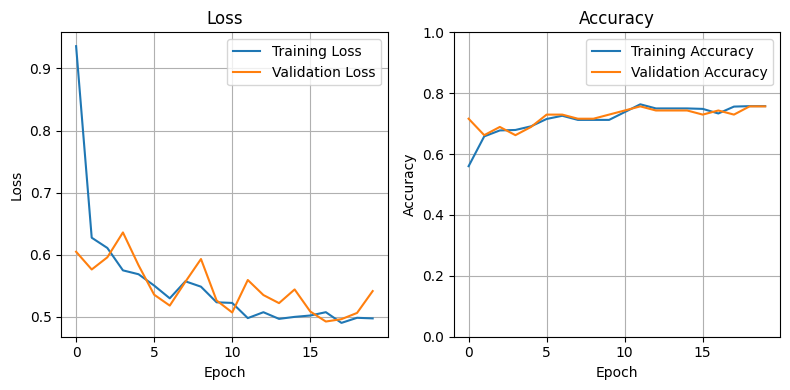

In [57]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))

axs[0].plot(history_2.history['loss'], label='Training Loss')
axs[0].plot(history_2.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history_2.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_2.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

In [66]:
y_pred = model_2.predict(X_test)
y_pred = np.round(y_pred)
target_names = ['healthy_corals', 'bleached_corals']

report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
healthy_corals,0.817204,0.745098,0.779487,102.000000
bleached_corals,0.717391,0.795181,0.754286,83.000000
accuracy,0.767568,0.767568,0.767568,0.767568
macro avg,0.767298,0.770139,0.766886,185.000000
weighted avg,0.772423,0.767568,0.768181,185.000000


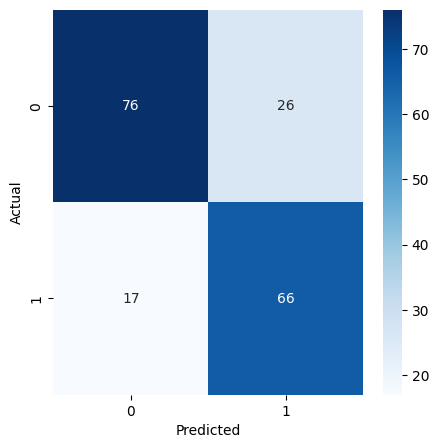

In [59]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model perform better but we can improve changing the hyperparameters

### Fine-tuning Model with Keras RandomSearch

Fine-tuning a model using RandomSearch with Keras can further enhance its performance by exploring a range of hyperparameters. This approach optimizes the model's architecture and parameters to achieve better results.

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Conv2D(hp.Int(f'conv_{i}_units', 32, 128, step=32), (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 64, 256, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=keras.metrics.MeanSquaredError())
    return model


In [99]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='corals_tuning'
)

In [100]:
# Perform the search
tuner.search(X_train, y_train, epochs=10,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

# Get the best hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best hyperparameters: {best_hps}")

# Build the model with the best hyperparameters and train it on the data
model_3 = tuner.hypermodel.build(best_hps)
history_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Trial 10 Complete [00h 04m 45s]
val_mean_squared_error: 0.25011228521664935

Best val_mean_squared_error So Far: 0.17068410416444144
Total elapsed time: 01h 13m 22s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000002921F4E0850>
Epoch 1/10
21/21 [==============================] - 10s 435ms/step - loss: 0.6565 - mean_squared_error: 0.2311 - val_loss: 0.5947 - val_mean_squared_error: 0.2050
Epoch 2/10
21/21 [==============================] - 9s 418ms/step - loss: 0.5361 - mean_squared_error: 0.1817 - val_loss: 0.5463 - val_mean_squared_error: 0.1836
Epoch 3/10
21/21 [==============================] - 9s 423ms/step - loss: 0.4717 - mean_squared_error: 0.1562 - val_loss: 0.5680 - val_mean_squared_error: 0.1883
Epoch 4/10
21/21 [==============================] - 9s 419ms/step - loss: 0.4568 - mean_squared_error: 0.1499 - val_loss: 0.7597 - val_mean_squared_error: 0.2421
Epoch 5/10
21/21 [==============================] - 9s 423ms/s

In [108]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print all hyperparameters and their values
print("Best hyperparameters:")
for hp_name, hp_value in best_hps.values.items():
    print(f"{hp_name}: {hp_value}")

Best hyperparameters:
num_layers: 1
conv_0_units: 64
dense_units: 96
dropout: 0.0
learning_rate: 0.0001
conv_1_units: 128
conv_2_units: 96


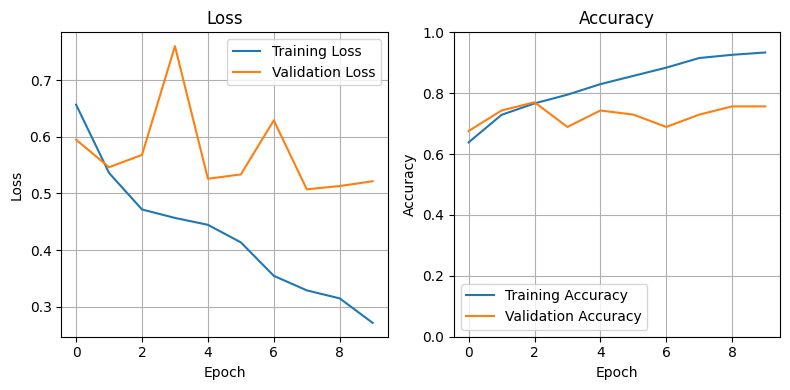

In [101]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))

axs[0].plot(history_3.history['loss'], label='Training Loss')
axs[0].plot(history_3.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

In [102]:
y_pred = model_3.predict(X_test)
y_pred = np.round(y_pred)
target_names = ['healthy_corals', 'bleached_corals']

report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
df = pd.DataFrame(report).transpose()
df

6/6 [==============================] - 1s 96ms/step


,precision,recall,f1-score,support
healthy_corals,0.839080,0.715686,0.772487,102.000000
bleached_corals,0.704082,0.831325,0.762431,83.000000
accuracy,0.767568,0.767568,0.767568,0.767568
macro avg,0.771581,0.773506,0.767459,185.000000
weighted avg,0.778513,0.767568,0.767975,185.000000


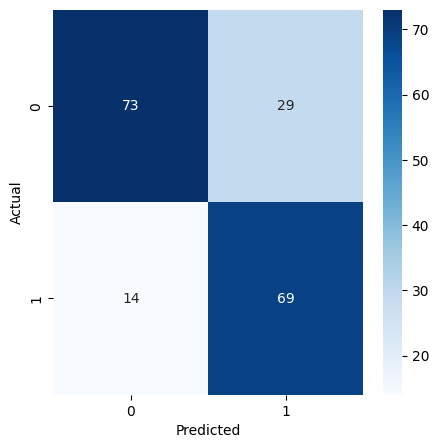

In [103]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We're facing a similar challenge of model 1: the problem lies in overfitting, evident as the training loss continues to decrease while the validation loss remains static.

### Augmentation and Early Stopping for Improved Model Performance

Implementing data augmentation and early stopping techniques can enhance the model's performance and prevent overfitting by regulating the training process. We use the same parameters of model 3

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
model_4 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(96, activation='relu'),
    Dropout(0.0),
    Dense(1, activation='sigmoid')
])

model_4.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
# use augmented
history_4 = model_4.fit(train_generator, epochs=20, validation_data=(X_valid, y_valid), callbacks=[EarlyStopping(patience=5)])

Epoch 1/20
21/21 [==============================] - 28s 1s/step - loss: 0.7858 - accuracy: 0.6130 - val_loss: 0.5607 - val_accuracy: 0.7027
Epoch 2/20
21/21 [==============================] - 28s 1s/step - loss: 0.5724 - accuracy: 0.6807 - val_loss: 0.5447 - val_accuracy: 0.7162
Epoch 3/20
21/21 [==============================] - 31s 1s/step - loss: 0.5416 - accuracy: 0.7108 - val_loss: 0.5122 - val_accuracy: 0.7027
Epoch 4/20
21/21 [==============================] - 27s 1s/step - loss: 0.5397 - accuracy: 0.7229 - val_loss: 0.5125 - val_accuracy: 0.7432
Epoch 5/20
21/21 [==============================] - 31s 1s/step - loss: 0.5609 - accuracy: 0.6988 - val_loss: 0.5260 - val_accuracy: 0.7027
Epoch 6/20
21/21 [==============================] - 30s 1s/step - loss: 0.5252 - accuracy: 0.7319 - val_loss: 0.5321 - val_accuracy: 0.7027
Epoch 7/20
21/21 [==============================] - 30s 1s/step - loss: 0.5178 - accuracy: 0.7349 - val_loss: 0.5023 - val_accuracy: 0.7432
Epoch 8/20
21/21 [==

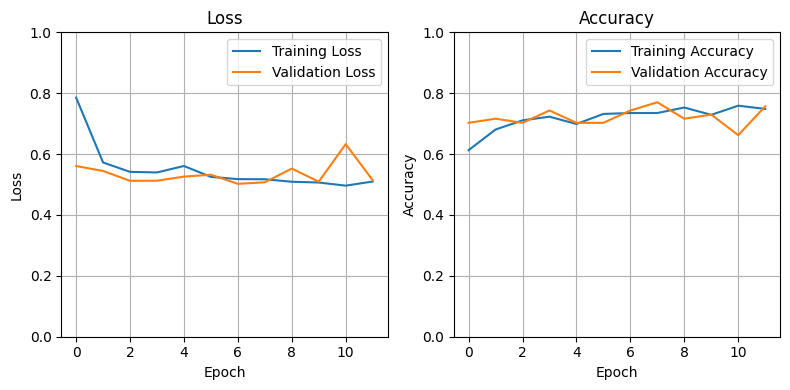

In [47]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))

axs[0].plot(history_4.history['loss'], label='Training Loss')
axs[0].plot(history_4.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_ylim(0, 1)
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history_4.history['accuracy'], label='Training Accuracy')
axs[1].plot(history_4.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True)


plt.tight_layout()
plt.show()

In [48]:
y_pred = model_4.predict(X_test)
y_pred = np.round(y_pred)
target_names = ['healthy_corals', 'bleached_corals']

report = classification_report(y_test, y_pred, output_dict=True, target_names=target_names)
df = pd.DataFrame(report).transpose()
df

6/6 [==============================] - 2s 293ms/step


,precision,recall,f1-score,support
healthy_corals,0.853933,0.745098,0.795812,102.000000
bleached_corals,0.729167,0.843373,0.782123,83.000000
accuracy,0.789189,0.789189,0.789189,0.789189
macro avg,0.791550,0.794236,0.788967,185.000000
weighted avg,0.797957,0.789189,0.789670,185.000000


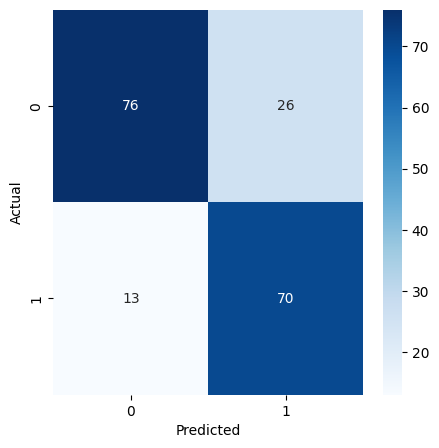

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

These strategies have collectively improved the robustness and performance of our model, ensuring its ability to generalize well to new data while mitigating the risk of overfitting.

The classification report show a accuracy of about 80%

To further improve the model, it is necessary to add additional layers or incorporate more data.

### Save the model

In [50]:
model_4.save('model_corals.keras')